In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image

import re

# Anaconda Prompt 에서 pip install selenium 실행
# !pip install selenium

In [3]:
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)
# 가상의 웹 브라우저 띄움

In [6]:
url_page = 'http://www.seleniumhq.org/projects/webdriver/'
driver.get(url_page)

In [7]:
driver.find_element_by_css_selector('#menu_download > a').click() #자동클릭

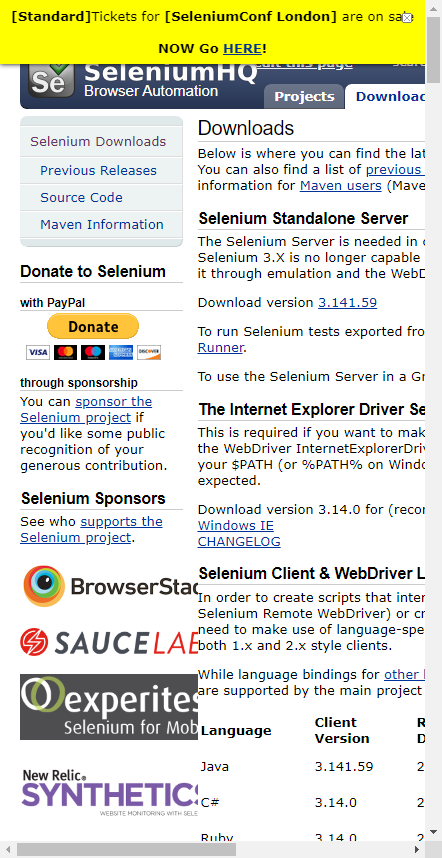

In [8]:
capture_img = './data/images/seleniumhq_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [10]:
driver.find_element_by_xpath('//*[@id="menu_documentation"]/a').click()

### 네이버 크롤링

In [11]:
url_page = 'https://naver.com'
driver.get(url_page)

In [1]:
# XQury
driver.find_element_by_css_selector('#PM_ID_serviceNavi > li:nth-child(6) > a > span.an_icon').click()

In [33]:
# 평점&리뷰 1등 페이지로 이동
driver.find_element_by_css_selector('#review1 > div > a').click()

In [16]:
driver.find_element_by_css_selector('#movieEndTabMenu > li:nth-child(6) > a').click()

In [17]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code=167560'

In [18]:
# pattern = re.compile("[\d+,?]+")
pattern = re.compile("\d{6}")
result = pattern.findall(current_url)
code = result[0] if len(result)>0 else ''
code

'167560'

In [19]:
review_url = current_url.replace(code, '{}')
review_url

'https://movie.naver.com/movie/bi/mi/review.nhn?code={}'

### NAVER 영화 리뷰페이지로 바로 이동

In [22]:
# 영화제목 검색키 입력
#movie_title = '봉오동 전투'
movie_title = '알라딘'
driver.find_element_by_css_selector('#ipt_tx_srch').send_keys(movie_title)

In [23]:
# 검색 클릭
driver.find_element_by_css_selector('#jSearchArea > div > button').click()

In [26]:
# 검색 첫번째 페이지로 이동
driver.find_element_by_css_selector('#old_content > ul:nth-child(4) > li:nth-child(1) > dl > dt > a').click()

In [27]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [28]:
soup.title

<title>알라딘 : 네이버 영화</title>

In [29]:
current_url = driver.current_url
current_url

'https://movie.naver.com/movie/bi/mi/basic.nhn?code=163788'

In [30]:
pattern = re.compile('\d{6}')
result = pattern.findall(current_url)
cod = result[0] if len(result) >0 else ''
code

'167560'

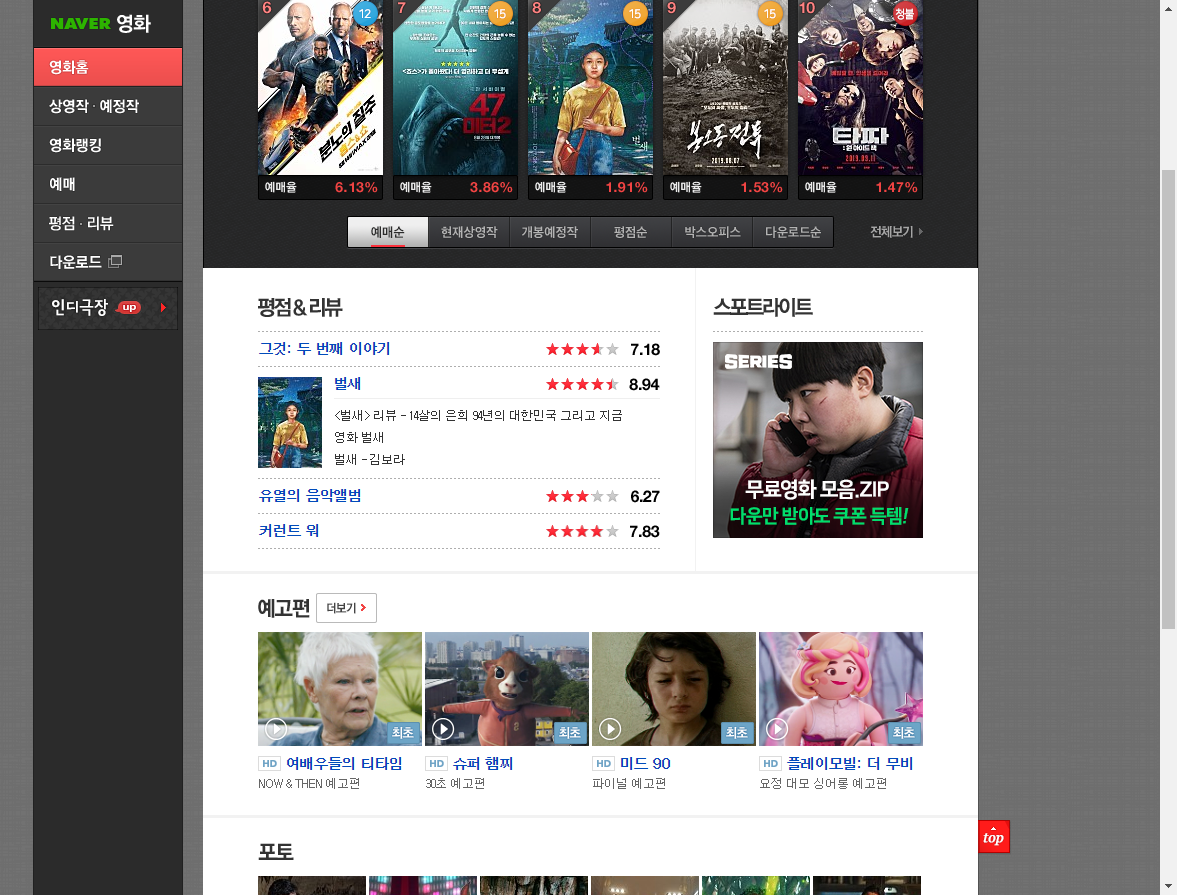

In [36]:
capture_img = './data/images/naver_moviee_{code}.png'.format(code=code)
driver.save_screenshot(capture_img)
Image(capture_img)

In [37]:
# 리뷰페이지로 바로 이동
url_page = review_url.format(code)
driver.get(url_page)

In [40]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
soup.title

<title>알라딘 : 네이버 영화</title>

In [41]:
movie_title = soup.title.get_text().split(':')[0].strip()
movie_title

'알라딘'